# DataCamp Data Analyst Professional Certification Exam

### Company Background

Pens & Printers is a national office supplies chain. At the moment, they send office supplies out of warehouses in four regions: East, Wesst, South, and Central, and all four warehouses stock the same products. The Head of Sales thinks this leads to large amounts of unsold products in some locations.

### Customer Question

The management would like to answer the following:
- Are there products that do not sell as well in some locations?
- Are there any other patterns over time in each region that you can find in the data?

### Dataset

- Order ID: Unique identifier for the individual order
- Order Date: Date of the order, in format YYYY-MM-DD
- Ship Mode: The method used to send out the order
- Region: The region the order was sent from
- Product ID: Unique identifier of the product ordered
- Category: Category of the product, one of 'Office supplies', 'Furniture', or 'Technology'
- Sub-Category: Subcategory of the product (e.g Binders, Paper, etc.)
- Product Name: The name of the product
- Sales: Total value of the products sold in the order
- Quantity: Quantity of the products in the order
- Discount Discount of the order in decimal form (e.g 0.30 indicates the order has a 30% discount, etc.)

### Goal of Project

- Perform exploratory analysis of the dataset to answer the customer question in order to identify products that do not sell as well in some locations.
- Perform exploratory analysis of the dataset to find hidden patterns or insights that are of significant business value.
- Communicate findings using explanatory visualizations to non-technical audience.

### Data Wrangling

#### Gather Data

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
office_supplies = pd.read_csv(r'C:\Users\HP\Downloads\office_supplies.csv')

#### Assess Data

In [3]:
# general information of the dataset
office_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


In [4]:
# descriptive statistics of the dataset
office_supplies.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,8000.000000
mean,229.854588,3.789553,0.156218,28.134233
std,623.276194,2.225220,0.206456,227.328814
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.814700
50%,54.480000,3.000000,0.200000,8.765100
75%,209.940000,5.000000,0.200000,29.950500
max,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# random sample of the dataset
office_supplies.sample(20)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2109,CA-2014-115259,2014-08-25,Second Class,East,OFF-EN-10002504,Office Supplies,Envelopes,"Tyvek Top-Opening Peel & Seel Envelopes, Plai...",130.464,6,0.2,44.0316
9278,CA-2017-151183,2017-10-14,Standard Class,West,TEC-AC-10003614,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,46.360,4,0.0,15.2988
1576,CA-2015-143147,2015-05-26,Second Class,Central,FUR-CH-10004754,Furniture,Chairs,"Global Stack Chair with Arms, Black",104.930,5,0.3,NaN
2018,CA-2016-121755,2016-01-16,Second Class,West,OFF-BI-10001634,Office Supplies,Binders,Wilson Jones Active Use Binders,11.648,2,0.2,4.2224
1976,US-2016-103674,2016-12-06,Standard Class,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,NaN
841,US-2016-112396,2016-02-09,Standard Class,West,TEC-AC-10004761,Technology,Accessories,Maxell 4.7GB DVD+RW 3/Pack,31.860,2,0.0,NaN
3626,CA-2016-106530,2016-05-08,Same Day,East,OFF-ST-10000649,Office Supplies,Storage,Hanging Personal Folder File,25.120,2,0.2,1.5700
1999,CA-2014-115812,2014-06-09,Standard Class,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
1293,CA-2017-161340,2017-05-28,Standard Class,East,OFF-PA-10002464,Office Supplies,Paper,HP Office Recycled Paper (20Lb. and 87 Bright),13.872,3,0.2,NaN
97,CA-2017-122798,2017-12-28,Standard Class,West,OFF-PA-10004239,Office Supplies,Paper,Xerox 1953,4.280,1,0.0,NaN


In [6]:
# check for duplicates
office_supplies.duplicated().sum()

1

In [7]:
# view the duplicated row
office_supplies[office_supplies.duplicated()]

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5399,US-2014-150119,2014-04-23,Standard Class,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


<AxesSubplot:>

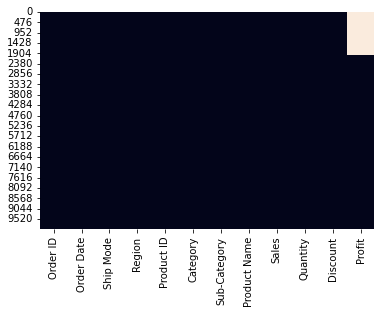

In [8]:
# plot a heatmap of null values
df_null = office_supplies.isnull()
sns.heatmap(df_null, cbar = False)

In [9]:
# number of rows with null values in the profit column
office_supplies.Profit.isnull().sum()

1993

Null values are only present in the profit column and it seems the null values are only present in the first 1,993 rows of the dataset. It would be interesting to investigate further why this is so.

In [10]:
# extract the first 1,993 rows of the dataset for investigation
null_investigation = office_supplies.iloc[:1994,:]

In [11]:
# visual assessment of first 20 rows of the investigation dataset
null_investigation.head(20)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.760,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.820,2,0.0,NaN
5,CA-2016-139808,2016-10-07,Standard Class,West,OFF-FA-10001883,Office Supplies,Fasteners,"Alliance Super-Size Bands, Assorted Sizes",93.360,12,0.0,NaN
6,CA-2015-110863,2015-11-17,Standard Class,Central,OFF-ST-10002756,Office Supplies,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",541.240,4,0.0,NaN
7,CA-2015-110863,2015-11-17,Standard Class,Central,OFF-PA-10000474,Office Supplies,Paper,Easy-staple paper,106.320,3,0.0,NaN
8,CA-2015-110863,2015-11-17,Standard Class,Central,FUR-CH-10002073,Furniture,Chairs,Hon Olson Stacker Chairs,1323.900,5,0.0,NaN
9,CA-2014-127859,2014-03-17,Second Class,East,OFF-PA-10003641,Office Supplies,Paper,Xerox 1909,126.624,6,0.2,NaN


In [12]:
# value counts of the regions 
null_investigation.Region.value_counts()

West       598
East       578
Central    506
South      312
Name: Region, dtype: int64

In [13]:
# value counts of the ship modes
null_investigation['Ship Mode'].value_counts()

Standard Class    1179
Second Class       381
First Class        318
Same Day           116
Name: Ship Mode, dtype: int64

__Data Quality__
- missing values in profit column
- Improper column names
- Excessive number of decimal places for the sales and profit column
- Inappropriate datatype for some columns
- One duplicated row in the dataset

#### Clean Data

###### Define
Rename all columns to change to lower case, replace spaces and hyphens with underscores

###### Code

In [14]:
# rename columns
office_supplies.columns = ['order_id','order_date','ship_mode','region','product_id','category','sub_category','product_name','sales','quantity','discount','profit']

###### Test

In [15]:
# confirm column name changes
office_supplies.columns

Index(['order_id', 'order_date', 'ship_mode', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

In [16]:
# view the column names with a few rows of data
office_supplies.head(2)

,order_id,order_date,ship_mode,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN


###### Define
Round sales and profit columns to two decimal places

###### Code

In [17]:
# round the sales and profit columns
office_supplies.sales = office_supplies.sales.round(2)
office_supplies.profit = office_supplies.profit.round(2)

###### Test

In [18]:
# a view of just the sales and profit columns with few rows
office_supplies[['sales','profit']].sample(5)

,sales,profit
8241,6.24,2.62
1546,6.85,NaN
9795,12.00,4.20
5118,563.81,21.14
2533,468.90,206.32


###### Define
Change all inappropriate datatypes to the appropriate datatype

###### Code

In [19]:
# extract the years from the order date column
office_supplies['year'] = office_supplies.order_date.str.extract(r"([0-9]{4})")

In [20]:
# extract the months from the order date column
office_supplies['month'] = office_supplies.order_date.str.extract(r"-([0-9]{2})-")

In [21]:
# convert order_date column to datetime datatype
office_supplies.order_date = pd.to_datetime(office_supplies.order_date)

In [22]:
# convert ship_mode, region and category columns to category datatype
office_supplies[['ship_mode','region','category']] = office_supplies[['ship_mode','region','category']].astype('category')
office_supplies[['year','month']] = office_supplies[['year','month']].astype('int')

###### Test

In [23]:
# check the year column
office_supplies.year.value_counts()

2017    3312
2016    2587
2015    2101
2014    1993
Name: year, dtype: int64

In [24]:
# check the month column
office_supplies.month.value_counts(dropna=False)

11    1470
12    1408
9     1383
10     819
5      735
6      717
7      710
8      706
3      696
4      668
1      381
2      300
Name: month, dtype: int64

In [25]:
# overview of the datatypes
office_supplies.dtypes

order_id                object
order_date      datetime64[ns]
ship_mode             category
region                category
product_id              object
category              category
sub_category            object
product_name            object
sales                  float64
quantity                 int64
discount               float64
profit                 float64
year                     int32
month                    int32
dtype: object

###### Define
Drop duplicate row and replace all missing values in the profit column with the mean

###### Code

In [26]:
# drop duplicate row
office_supplies = office_supplies.drop_duplicates(keep='first')

In [27]:
# replace all null values with the mean of the profit column
office_supplies.profit = office_supplies.profit.fillna(round(office_supplies.profit.mean(),2))

###### Test

In [28]:
# check for duplicates
office_supplies.duplicated().sum()

0

In [29]:
# check for null values in the profit column
office_supplies.profit.isnull().sum()

0

### Exploratory Analysis

__Question 1__: Are there products that do not sell as well in some locations?

Investigate the sales variable

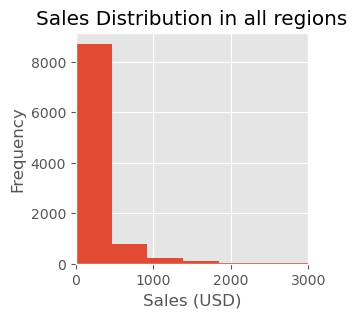

In [309]:
# plot a histogram to show distribution of the sales variable
fig, ax = plt.subplots(figsize=[3,3])
ax.hist(office_supplies.sales, bins = np.linspace(office_supplies.sales.min(),office_supplies.sales.max(), 50));
plt.xlim([0,3000])
#plt.xlim(0,office_supplies.sales.max() + 500)
plt.title('Sales Distribution in all regions');
plt.ylabel('Frequency');
plt.xlabel('Sales (USD)');

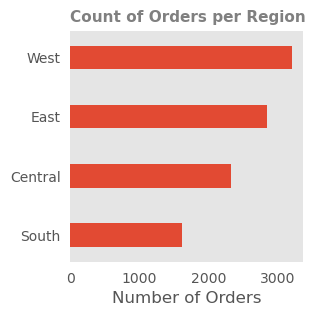

In [305]:
# bar chart to show the number of orders for each region
plt.style.use('default')
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=[3,3])
ax = office_supplies.region.value_counts().sort_values(ascending=True).plot.barh(width=0.4)
for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
ax.tick_params(grid_alpha=0,left=False,bottom=False)
ax.set_xlabel('Number of Orders');
ax.text(0,3.6,'Count of Orders per Region',size=11,color='gray',weight='bold');
fig.savefig('count_per_region',dpi=300)

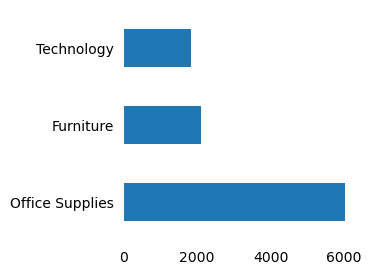

In [266]:
# bar chart to show the number of orders for each region
plt.style.use('default')
fig, ax = plt.subplots(figsize=[3,3])
ax = office_supplies.category.value_counts().plot.barh()
for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
ax.tick_params(left=False,bottom =False)

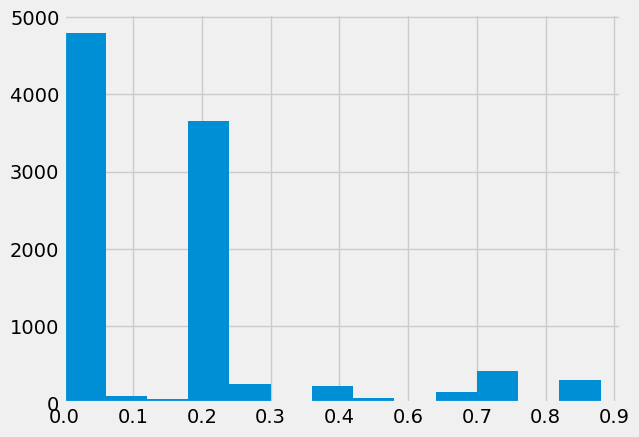

In [234]:
# histogram showing distribution of discount
fig, ax = plt.subplots()
ax.hist(office_supplies.discount, bins = np.linspace(office_supplies.discount.min(),office_supplies.discount.max()+0.2,16));
ax.set_xticks(np.linspace(0,1.0,10),['{:.1f}'.format(x) for x in np.linspace(0,1,10)]);
plt.xlim([0,0.9]);

Investigate the regions with the best sales

In [32]:
# group the dataset by regions to show sales
region_sales = office_supplies.groupby('region').sum()['sales'].sort_values(ascending=False).reset_index()
region_sales

,region,sales
0,West,725457.80
1,East,678499.96
2,Central,500975.81
3,South,391721.85


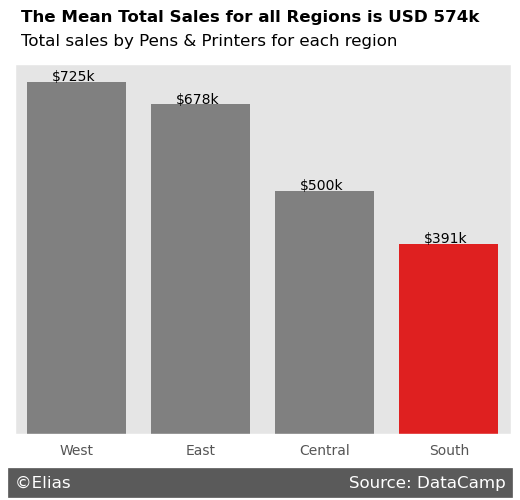

In [292]:
# plot a bar chart to show the total sales for each region
plt.style.use('default')
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax = sns.barplot(data=region_sales,x='region',y='sales', palette = ['gray','gray','gray','red'], order = region_sales.region)
ax.text(-0.45,850000,'The Mean Total Sales for all Regions is USD 574k',size=12,weight='bold')
ax.text(-0.45,800000,'Total sales by Pens & Printers for each region',size=12)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticks([])
ax.tick_params(which='major',bottom=False,top=False,grid_alpha=0.0)
for i, h, text in zip(range(4),region_sales.sales,['$725k','$678k','$500k','$391k']):
    ax.text(i-0.2,h + 3500,text)
ax.text(-0.5,-110000,'©Elias'+' '*53+'Source: DataCamp',backgroundcolor='#5A5A5A',size=12,color='white');

Investigate the correlation between quantity and sales

In [237]:
# correlation between sales, quantity, profit and discount
corr = office_supplies.corr()[['sales','quantity','discount','profit']].loc['sales':'profit']

,sales,quantity,discount,profit
sales,1.000000,0.200808,-0.028193,0.369756
quantity,0.200808,1.000000,0.008687,0.056299
discount,-0.028193,0.008687,1.000000,-0.202151
profit,0.369756,0.056299,-0.202151,1.000000


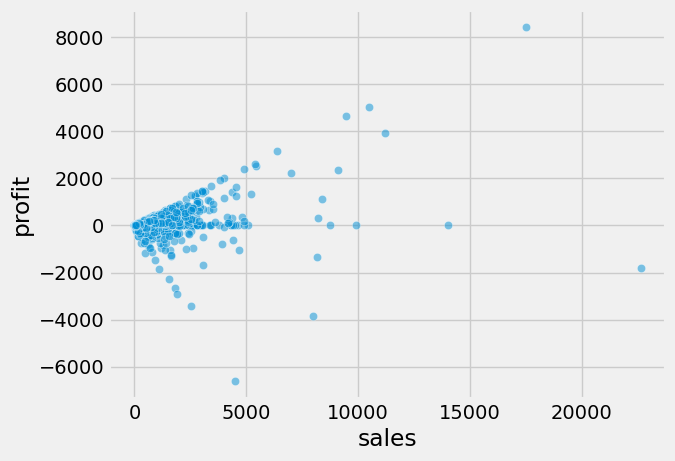

In [239]:
# scatter plot of sales against profit
fig, ax = plt.subplots()
ax = sns.scatterplot(data=office_supplies,x='sales',y='profit',alpha=0.5)

There is a weak to moderate correlation between profit and sales

Create a pivot table to show the quantity and sales of each product category ordered for different regions

In [36]:
# group by region and category and summarize by sum
reg_cat_sum_group = office_supplies[['region','category','sales']].groupby(['region','category']).sum().reset_index()
reg_cat_sum_group

,region,category,sales
0,Central,Furniture,163797.15
1,Central,Office Supplies,167026.33
2,Central,Technology,170152.33
3,East,Furniture,208009.77
4,East,Office Supplies,205516.15
5,East,Technology,264974.04
6,South,Furniture,117298.68
7,South,Office Supplies,125651.28
8,South,Technology,148771.89
9,West,Furniture,252612.76


In [37]:
# create a pivot table with regions as index and product categories as columns
reg_cat_sum_pivot = reg_cat_sum_group.pivot(index='category',columns='region')
reg_cat_sum_pivot = reg_cat_sum_pivot.sort_values('Furniture',axis=1)
reg_cat_sum_pivot

sales                                 
region               South    Central       East       West
category                                                   
Furniture        117298.68  163797.15  208009.77  252612.76
Office Supplies  125651.28  167026.33  205516.15  220853.19
Technology       148771.89  170152.33  264974.04  251991.85

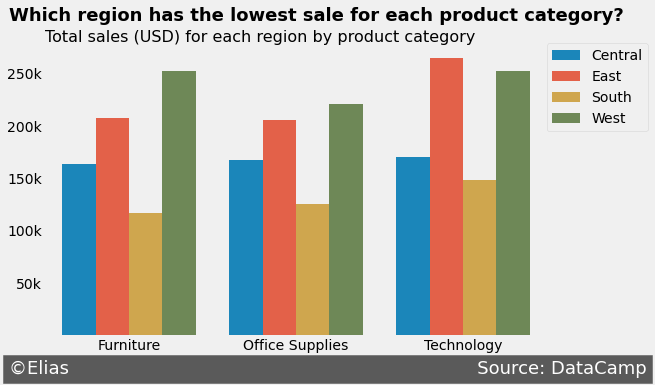

In [38]:
# stacked bar chart to show total sales for each category in each region
fig, ax = plt.subplots(figsize=[8,5])
ax = sns.barplot(data=reg_cat_sum_group, x='category',y='sales',hue='region');
ax.set_yticks([50000,100000,150000,200000,250000],['50k','100k','150k','200k','250k']);
ax.tick_params(which='major',bottom=False,top=False,grid_alpha=0.0);
ax.set_xlabel('');
ax.set_ylabel('');
ax.legend(loc=[1,0.7]);
ax.text(-0.72,300000,'Which region has the lowest sale for each product category?',weight='bold',size=18);
ax.text(-0.5,280000,'Total sales (USD) for each region by product category',size=16);
ax.text(-0.72,-36500,'©Elias'+' '*71+'Source: DataCamp',backgroundcolor='#5A5A5A',size=18,color='white');

Text(0, -0.5, 'Total sales for each product category by region')

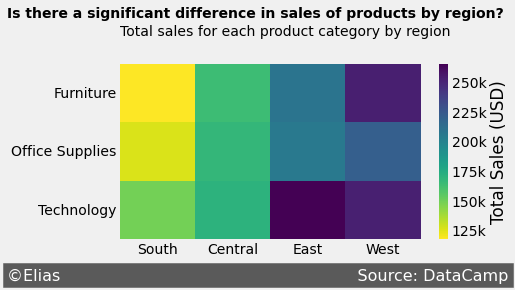

In [39]:
# heat map to show the density of total sales for each category in each region
fig, ax = plt.subplots(figsize=[6,3])
ax = sns.heatmap(reg_cat_sum_pivot.sales,cmap='viridis_r',cbar_kws={'label':'Total Sales (USD)'})
cbar = ax.collections[0].colorbar
cbar.set_ticks([125000,150000,175000,200000,225000,250000]);
cbar.set_ticklabels(['125k','150k','175k','200k','225k','250k']);
ax.set_ylabel('');
ax.set_xlabel('');
ax.text(-1.5,3.70,'©Elias'+' '*58+'Source: DataCamp',backgroundcolor='#5A5A5A',size=16,color='white');
ax.text(-1.5,-0.8,'Is there a significant difference in sales of products by region?',weight='bold',size=14);
ax.text(0,-0.5,'Total sales for each product category by region',size=14)

In [40]:
reg_cat_profit_group = office_supplies[['region','category','profit']].groupby(['region','category']).sum().reset_index()
reg_cat_profit_group

,region,category,profit
0,Central,Furniture,2435.11
1,Central,Office Supplies,15738.41
2,Central,Technology,30159.72
3,East,Furniture,5166.31
4,East,Office Supplies,40777.71
5,East,Technology,42806.40
6,South,Furniture,10740.05
7,South,Office Supplies,20794.89
8,South,Technology,15982.88
9,West,Furniture,10645.92


In [249]:
# group dataset by region and summarize the discount column by its mean and median
discount_group = office_supplies[['region','discount']].groupby('region').agg([np.mean,np.median]).reset_index()
discount_group

region  discount       
                mean median
0  Central  0.240457    0.2
1     East  0.145311    0.0
2    South  0.147253    0.2
3     West  0.109335    0.0

In [41]:
reg_subcat_sum_group = office_supplies[['region','sub_category','sales']].groupby(['region','sub_category']).sum().reset_index()
reg_subcat_sum_group

,region,sub_category,sales
0,Central,Accessories,33956.08
1,Central,Appliances,23581.98
2,Central,Art,5765.32
3,Central,Binders,56923.26
4,Central,Bookcases,24157.16
...,...,...,...
63,West,Paper,26663.73
64,West,Phones,98684.39
65,West,Storage,70532.84
66,West,Supplies,18127.12


In [42]:
# create a pivot table with regions as index and product sub-categories as columns
reg_subcat_sum_pivot = reg_subcat_sum_group.pivot(index='sub_category',columns='region')
reg_subcat_sum_pivot = reg_subcat_sum_pivot.sort_values('Accessories',axis=1)
reg_subcat_sum_pivot

sales                                
region           South   Central       East       West
sub_category                                          
Accessories   27276.75  33956.08   45033.38   61114.10
Appliances    19525.34  23581.98   34188.50   30236.32
Art            4655.65   5765.32    7485.77    9212.06
Binders       37030.31  56923.26   53498.06   55961.10
Bookcases     10899.37  24157.16   43819.33   36004.12
Chairs        45176.44  85230.67   95979.26  101781.36
Copiers        9299.75  37259.57   53219.46   49749.23
Envelopes      3345.55   4636.85    4375.88    4118.10
Fasteners       503.31    778.02     819.72     923.20
Furnishings   17306.68  15254.35   29071.36   30072.73
Labels         2353.18   2451.48    2602.92    5078.72
Machines      53890.96  26797.38   66106.18   42444.13
Paper         14150.98  17491.91   20172.62   26663.73
Phones        58304.43  72139.30  100615.02   98684.39
Storage       35768.03  45930.14   71612.58   70532.84
Supplies       8318.93   9467.37   10760.10   18127.12
Tables        43916.19  39154.97   39139.82   84754.55

In [43]:
furniture = office_supplies[office_supplies.category == 'Furniture']
office = office_supplies[office_supplies.category == 'Office Supplies']
tech = office_supplies[office_supplies.category == 'Technology']

In [44]:
furniture.sub_category.value_counts()

Furnishings    957
Chairs         616
Tables         319
Bookcases      228
Name: sub_category, dtype: int64

In [45]:
office.sub_category.value_counts()

Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Supplies       190
Name: sub_category, dtype: int64

In [46]:
tech.sub_category.value_counts()

Phones         888
Accessories    775
Machines       115
Copiers         68
Name: sub_category, dtype: int64

In [47]:
west = office_supplies[office_supplies.region == 'West']
east = office_supplies[office_supplies.region == 'East']
south = office_supplies[office_supplies.region == 'South']
central = office_supplies[office_supplies.region == 'Central']

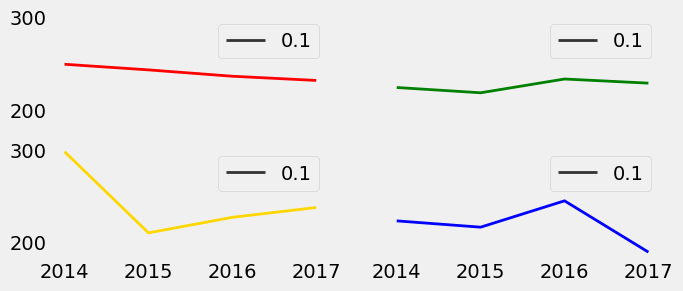

In [55]:
plt.style.use('default')
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=[7,3],sharex=True,sharey=True)
for x,y, region, color in zip([0,0,1,1],[0,1,0,1],[east,west,south,central],['red','green','gold','blue']):
    #data = office_supplies[office_supplies.year == time]
    ax[x,y] = sns.lineplot(data=region,x='year',y='sales',ax=ax[x,y],ci=None,size=0.1,color=color);
    ax[x,y].set_xlabel('')
    ax[x,y].set_ylabel('')
    ax[x,y].tick_params(which='major',grid_alpha=0.0)

In [256]:
# calculate mean sale per year for each region
mean_sale_per_year = office_supplies.groupby(['region','year']).sum().sales.reset_index().pivot(index='region',columns='year').mean(axis=1).sort_values(ascending=False).reset_index()
mean_sale_per_year.columns = ['region','mean_sale_per_year']
mean_sale_per_year

,region,mean_sale_per_year
0,West,181364.4500
1,East,169624.9900
2,Central,125243.9525
3,South,97930.4625


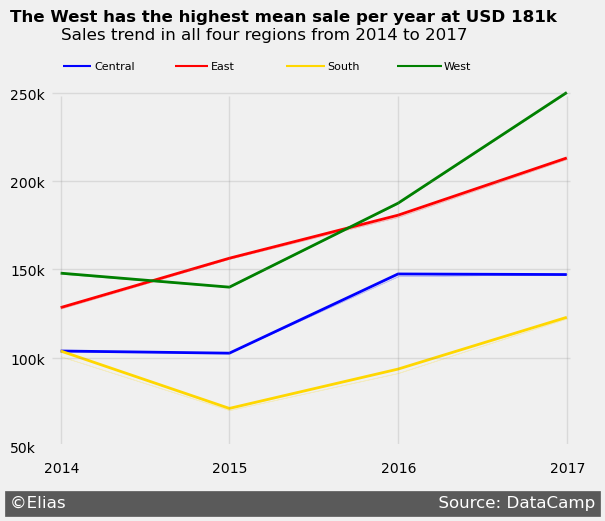

In [258]:
fig,ax = plt.subplots()
ax =sns.lineplot(data = office_supplies,x='year',y='sales',estimator='sum',legend=False,hue='region',ci=False,palette=['blue','red','gold','green'],size=0.1);
plt.ylim([50000,270000])
ax.tick_params(which='major',grid_alpha=0.0);
ax.set_yticks([]);
ax.set_xticks([]);
ax.set_ylabel('')
ax.set_xlabel('')
y = 265000
xmin = 0.05
xmax = 0.1
x = 2014.2
for color, region in zip(['blue','red','gold','green'],['Central','East','South','West']):
    ax.axhline(y=y,color=color,linewidth=1.5,alpha=1.0,xmin=xmin,xmax=xmax);
    ax.text(x,y-2000,region,size=8);
    xmin += 0.2
    xmax += 0.21
    x += 0.69
for y in [250000,200000,150000,100000,50000]:
    ax.axhline(y=y,color='gray',linewidth=1,alpha=0.2,xmin=0.03,xmax=.96);
for x in [2014,2015,2016,2017]:
    ax.axvline(x=x,color='gray',linewidth=1,alpha=0.2,ymax=0.9);
for y, text in zip([246000,196000,146000,96000,46000,],['250k','200k','150k','100k','50k']):
    ax.text(2013.7,y,text,size=10);
for x in [2014,2015,2016,2017]:
    ax.text(x-0.1,35000,'{}'.format(x),size=10);
ax.text(2013.7,15000,'©Elias'+' '*71+'Source: DataCamp',backgroundcolor='#5A5A5A',size=12,color='white');
ax.text(2013.7,290000,'The West has the highest mean sale per year at USD 181k',size=12,weight='bold');
ax.text(2014,280000,'Sales trend in all four regions from 2014 to 2017',size = 12);